In [ ]:
# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv')

# Display first 10 rows
print(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

In [ ]:
# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display the head of the data
print(nasdaq.head())

# Inspect the data
nasdaq.info()

In [ ]:
nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')
print(nyse.head())
nyse.info()

In [ ]:
xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = pd.read_excel(xls,sheet_name=exchanges,na_values='n/a')
listings['nasdaq'].info()

In [ ]:
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq',na_values='n/a')

nyse.info()
nasdaq.info()

nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] ='NASDAQ'

combined_listings = pd.concat([nyse, nasdaq])

In [ ]:
# Create the pd.ExcelFile() object
xlsx = pd.ExcelFile('listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
    
# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

In [1]:
# Import DataReader
from pandas_datareader.data import DataReader


# Import date
from datetime import date

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'iex'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

In [3]:
from pandas_datareader.data import DataReader
from datetime import date
series_code = 'DGS10' # 10year treasury Rate
data_source = 'fred'#FED Economic Data Service
start = date(1962,1,1)
data = DataReader(series_code, data_source, start)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15812 entries, 1962-01-02 to 2022-08-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGS10   15138 non-null  float64
dtypes: float64(1)
memory usage: 247.1 KB


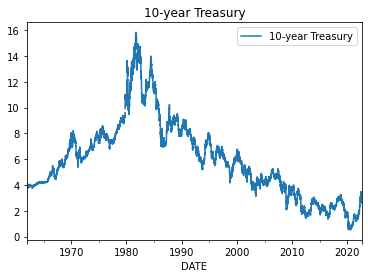

In [6]:
import matplotlib.pyplot as plt
series_name = '10-year Treasury'
data = data.rename(columns={series_code: series_name})
data.plot(title=series_name);plt.show()

In [ ]:
start = date(2000,1,1)
series = 'DCOILWTICO' #West Texas Intermediate Oil Price
oil = DataReader(series, 'fred', start)
ticker = 'XOM' #Exxon Mobile Corporation
stock = DataReader(ticker, 'google', start)
data = pd.concat([stock[['Close']], oil], axis=1)
data.info()

In [ ]:
# Set start date
start = date(1968,1,1)

# Set series code
series = 'WTISPLC'

# Import the data
oil_price = DataReader(series, 'fred', start=start)

# Inspect the price of oil
oil_price.info()

# Plot the price of oil
oil_price.plot(title='Oil Price')

# Show the plot
plt.show()

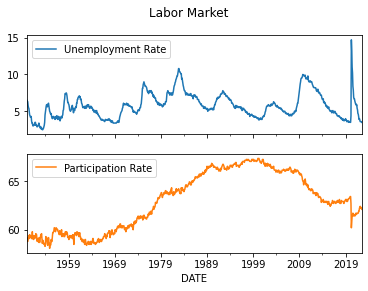

In [12]:
# Set the start date
start = date(1950, 1,1)

# Define the series codes
series = ['UNRATE','CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

In [ ]:
# Set the start date
start = date(2008, 1,1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()